# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [4]:
sid = '260219'
rec_date = '2019-02-26'
mypath = 'DDC_Data/'

acc_filepath = mypath + sid + '/' + sid + '-log_acc.csv'
df_raw = pd.read_csv(acc_filepath, header=None, names=['x','y','z','timestamp'])

bool_list = df_raw['timestamp'].str[:10] == rec_date

df1 = df_raw[bool_list]
df1 = df1.reset_index(drop=True)

xyz_cols = ['x','y','z']
g = 9.8

for c in xyz_cols:
    df1[c] = df1[c].apply(lambda x: x/g)

X_dict = df1[xyz_cols].to_dict(orient='split')

In [3]:
%run load_dataset.ipynb

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2001's data
Loading 2002's data
Finished loading


In [5]:
X_all = np.array(X_dict['data'])
X_all

array([[-0.07634571,  0.40628137,  0.87095194],
       [-0.07194821,  0.39015716,  0.89831418],
       [-0.07732294,  0.40872443,  0.89733694],
       ..., 
       [-0.07158174,  0.32578245,  1.13797867],
       [-0.1048074 ,  0.22854854,  0.78129153],
       [-0.23184666,  0.26714894,  0.7236352 ]])

In [6]:
y_all = np.zeros(X_all.shape[0])

# Data Preprocessing

In [7]:
%run preprocess_for_SVM.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [34]:
print(X_all.shape, y_all.shape)

(169647, 3) (169647,)


# Labels

In [8]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

# Apply PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
n_comp = 3

pca = PCA(n_components=n_comp)
X_pca = pca.fit(X_all).transform(X_all)

In [11]:
X_svm, y_svm = prepare_impure_label(X_pca, y_all)

In [12]:
print(X_svm.shape, y_svm.shape)

(169588, 180) (169588,)


# SVM

In [16]:
filename = 'model/svm_model.pkl'

svm_model = pickle.load(open(filename, 'rb'))

C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator SVC from version 0.20.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [21]:
y_pred = svm_model.predict(X_svm)

AttributeError: 'SVC' object has no attribute '_impl'

In [ ]:
print(y_pred.shape)

## SVM Evaluation

In [ ]:
%run eval_score.ipynb

In [ ]:
LABELS = ['sit','sleep','stand','walk']

# Walk Algorithm

In [ ]:
%run classifier_alg.ipynb

In [ ]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
# walk_exact_p = get_exact_walk(y_all)
    
# walk_pred = binarize_walk_prd(walk_pred_p, y_all)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
# walk_exact = binarize_walk_prd(walk_exact_p, y_all)

# Combine SVM and Walk Algorithm

In [51]:
y_pred_new = combine(X_svm, y_pred)

In [81]:
y_pred_new = np.array(y_pred_new)

df1['y_pred'] = pd.Series(y_pred_new)

In [83]:
for i in range(len(df1)):
    if(not (df1.loc[i, 'y_pred'] in [0.0,1.0,2.0,3.0])):
        keep = i
        break

In [85]:
df_no_null = df1[:keep].copy()

df_no_null['y_pred'] = df_no_null['y_pred'].astype(int)

In [86]:
df_no_null

,x,y,z,timestamp,y_pred
0,-0.076346,0.406281,0.870952,2019-02-26 10:11:22.151,0
1,-0.071948,0.390157,0.898314,2019-02-26 10:11:22.251,0
2,-0.077323,0.408724,0.897337,2019-02-26 10:11:22.416,0
3,-0.073414,0.396021,0.900757,2019-02-26 10:11:22.612,0
4,-0.094424,0.384782,0.888542,2019-02-26 10:11:22.793,0
5,-0.094913,0.363283,0.897337,2019-02-26 10:11:22.94,0
6,-0.073903,0.457586,0.883167,2019-02-26 10:11:23.069,0
7,-0.097356,0.364749,0.910530,2019-02-26 10:11:23.211,0
8,-0.079277,0.395043,0.898314,2019-02-26 10:11:23.375,0
9,-0.099799,0.388691,0.900269,2019-02-26 10:11:23.535,0


In [25]:
df_no_null['y_pred'].value_counts()

NameError: name 'df_no_null' is not defined

In [23]:
%run test_SVM_model.ipynb

In [24]:
LABELS = ['sit','sleep','stand','walk']

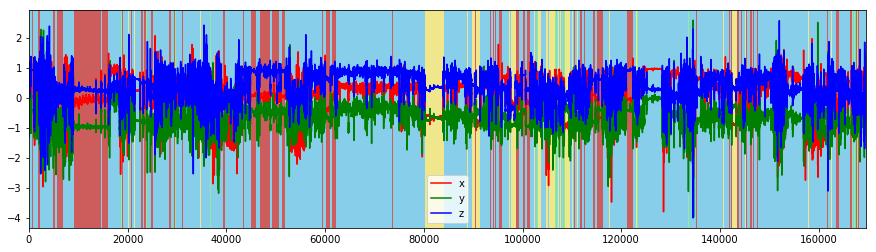

In [93]:
pred_periods = get_predicted_periods(df_no_null)
pp_all_run = postprocess_predicted(pred_periods, df_no_null)

df_no_null['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_no_null)

ax1 = df_no_null.plot(y=['x','y','z'], figsize=(15,4), color=['r','g','b'])

color_list = ['indianred','khaki','lightgreen','skyblue']   # sit, sleep, stand, walk

for i in range(len(pred_periods)):
    for item in pred_periods[i]:
        ax1.axvspan(item[0], item[1], color=color_list[i])

In [94]:
fig = ax1.get_figure()
fig.savefig('Graphs/all_day_260219.png', dpi=300)

# Display Table

In [18]:
from prettytable import PrettyTable

In [26]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

NameError: name 'df_y' is not defined

In [40]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in  
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [41]:
print(t)

+-------------------------+-------------------------+-------+
|          start          |           end           |  pred |
+-------------------------+-------------------------+-------+
| 2019-01-16 14:22:22.075 |  2019-01-16 14:22:55.19 | stand |
| 2019-01-16 14:22:55.351 | 2019-01-16 14:23:21.075 |  sit  |
| 2019-01-16 14:23:21.231 | 2019-01-16 14:24:03.667 | stand |
| 2019-01-16 14:24:03.828 | 2019-01-16 14:24:03.828 |  walk |
| 2019-01-16 14:24:03.989 | 2019-01-16 14:24:04.149 | stand |
| 2019-01-16 14:24:04.312 | 2019-01-16 14:24:04.631 |  walk |
| 2019-01-16 14:24:04.793 | 2019-01-16 14:24:05.436 | stand |
| 2019-01-16 14:24:05.596 | 2019-01-16 14:24:09.617 |  walk |
| 2019-01-16 14:24:09.775 | 2019-01-16 14:24:10.257 |  sit  |
|  2019-01-16 14:24:10.42 | 2019-01-16 14:24:43.204 | sleep |
| 2019-01-16 14:24:43.375 | 2019-01-16 14:24:47.543 |  walk |
| 2019-01-16 14:24:47.701 | 2019-01-16 14:25:27.073 |  sit  |
| 2019-01-16 14:25:27.234 | 2019-01-16 14:25:57.121 | sleep |
| 2019-0

In [61]:
print(len(label_period)-1)

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

136
[['sit', 25], ['sleep', 2], ['stand', 45], ['walk', 65]]


In [66]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)-1])

In [67]:
print(tabl_act_chng)

+---------------+------------------+
|     Label     | Activities Count |
+---------------+------------------+
|      sit      |        25        |
|     sleep     |        2         |
|     stand     |        45        |
|      walk     |        65        |
|               |                  |
| total changes |       136        |
+---------------+------------------+


## Frequency Active <-> Inactive

In [ ]:
headers = ['Frequency', 'Activities Count']
tabl_Feq = PrettyTable(headers)
Fq1 = 0
isActive = None
if(labels_list[label_period[2]] == 'stand' or labels_list[label_period[2]] == 'walk') :
    isActive = True
else :
    isActive = False
    
for fq in label_period :
    if((labels_list[fq[2]] == 'stand' or labels_list[fq[2]] == 'walk') and isActive == False):
        Fq1 += 1
        isActive = True
    else if((labels_list[fq[2]] == 'sleep' or labels_list[fq[2]] == 'sit') and isActive == True) :
        Fq1 += 1
        isActive = False
    else :
        waste = 0

tabl_Feq.add_row(['Frequency Active <-> Inactive', Fq1])

In [ ]:
print(tabl.Freq)

## Active Inactive AC (ALL)

In [20]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []
for ac in activity_change :
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]
inactive_table.append(['Inactive', sum])
active_table.append(['Active', sum_2])
tabl_act.add_row([inactive_table[0],inactive_table[1]])
tabl_act.add_row([active_table[0],active_table[1]])

NameError: name 'activity_change' is not defined

In [ ]:
print(tabl.act)

# Predicted Duration

In [43]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Seconds', 'Percentage'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], total_secs[i], percent_secs[i]])

tb.add_row(['', '', ''])
tb.add_row(['total', round(np.sum(total_secs), 3), round(np.sum(percent_secs), 3)])

# Actual Duration

In [44]:
df_lb = df_sid.groupby('label')
old_labels_list = ['sit', 'sleep', 'stand', 'walk']

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(old_labels_list)):
    lb = old_labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
for i in range(len(dura_dict)):
    if(dura_dict[i] >= 60):
        min = round(dura_dicr[i]/60)
        sec = (dura_dict[i]%60)/100
        min = min+sec
        dura_dict[i] = min

total_dura = np.sum([dura_dict[lb] for lb in labels_list])
min = total_dura%60
sec_to_min = min /60
sec_to_sec = (min%60)/100
toal_dura = sec + sec_to_min + sec_to_sec

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, dura_dict[lb], round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', total_dura, np.sum(percent_list)])

# Activity Durations Table

In [45]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

Prediction
+-------+---------+------------+
| Label | Seconds | Percentage |
+-------+---------+------------+
|  sit  |  75.69  |   18.242   |
| sleep |  62.671 |   15.104   |
| stand | 160.383 |   38.654   |
|  walk | 116.177 |    28.0    |
|       |         |            |
| total | 414.921 |   100.0    |
+-------+---------+------------+
Actual
+-------+---------+------------+
| Label | Seconds | Percentage |
+-------+---------+------------+
|  sit  |   60.0  |   16.901   |
| sleep |   60.0  |   16.901   |
| stand |   90.0  |   25.352   |
|  walk |  145.0  |   40.845   |
|       |         |            |
| total |  355.0  |   99.999   |
+-------+---------+------------+


# Bar Chart for Every 5 Minutes

In [46]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [47]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

14:20:0.0 14:30:0.0


In [48]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

## Active inactive frequency

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
strat = calc_sec(label_period[0][s_idx].split(' ')[1])
finish = calc_sec(label_period[-1][s_idx].split(' ')[1])
for i in label_period:
    if(row[0] >= )

## Plot Bar Graph

NameError: name 'test_subj' is not defined

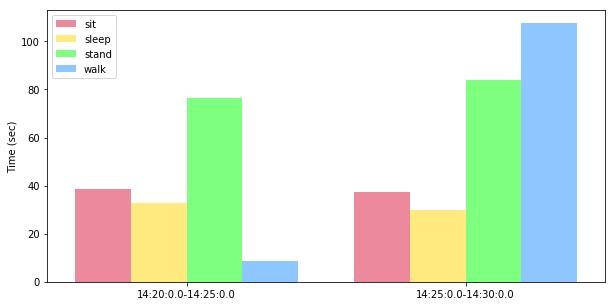

In [50]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + test_subj)

plt.show()